<a href="https://colab.research.google.com/github/i8dacake/Mat-421/blob/main/ModuleG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **21. Numerical Integration**

We know that to find the area under a curve, one must calculate the **integral** of a function. Integrals have numerous, useful applications in the fields of science, engineering, business, and many others for purposes of modeling, predicting and comprehending the functioning of systems. However, there is a catch which is the difficulty in finding an exact solution for the integral of a function. It can also be impossible sometimes. Therefore, the following sections show various methods of numerically integrating functions.   

## **21.1 Numerical Integration Problem Statement**

Given a function $f(x)$, how do we approximate the integral of $f(x)$ over the interval $[a,b]$? We assume that the interval is discretized into a numerical grid, $x$, consisting of $n + 1$ points with spacing, $h = b - an$. Each point in x is denoted by $x_i$, where $x_0 = a$ and $x_n = b$. The interval $[x_i, x_{i+1}]$ is referred to as a **subinterval**.

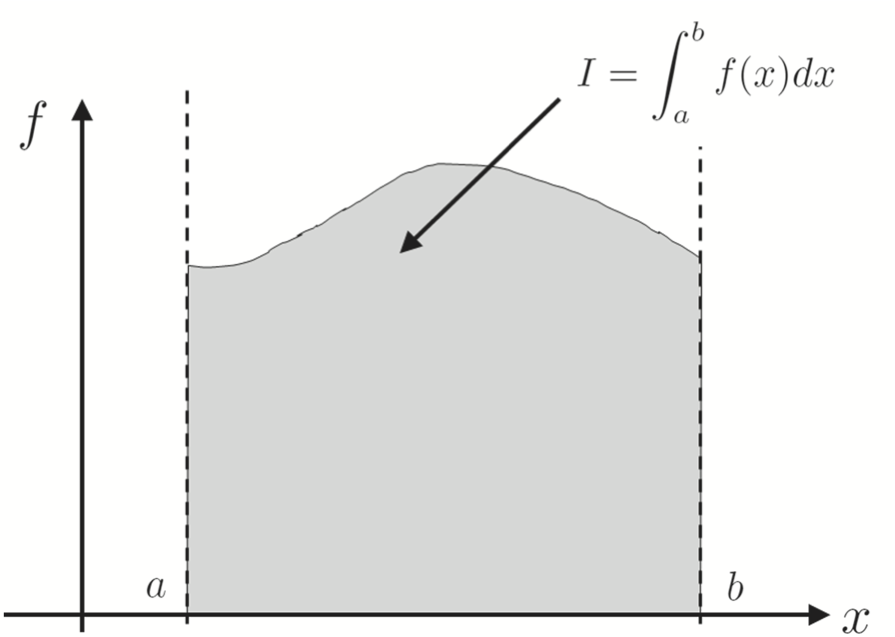

## **21.2 Riemann’s Integral**

The **Riemann's Integral** approximates integrals is by summing the area of rectangles that are defined for each subinterval. The width of the rectangle is $x_{i+1} - x_i = h$, and the height is defined by a function value 𝑓(𝑥) for some 𝑥 in the subinterval. For the height, choose the function value at the left endpoint, $x_i$, or the right endpoint, $x_{i+1}$, because these values can be used even if the function itself is not known. This method gives us $\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_i)$ or $\int_a^b f(x) dx \approx \sum_{i = 1}^{n} hf(x_i)$, respectively.

As $h$ gets smaller, the accuracy improves. In the approximation $\int_{x_i}^{x_{i+1}} f(x) dx = hf(x_i) + O(h^2)$, where $h = \frac{b - a}{n},$ and the total error becomes$\frac{b - a}{h}O(h^2) = O(h)$ over the whole interval. Thus, the **overall accuracy** is $O(h)$.

The **Midpoint Rule** takes the rectangle height of the rectangle at each subinterval to be the function value at the midpoint between $x_i$ and $x_{i+1}$, denoted by $y_i = \frac{x_{i+1} + x_i}{2}$. The Midpoint Rule says $\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf(y_i)$.

Finally, the integral of f(x) will become $\int_{x_i}^{x_{i+1}} f(x) dx= hf(y_i) + O(h^3)$. Since $ℎ𝑓(𝑦_𝑖)$ is the approximation of the integral over the subinterval, the Midpoint Rule is $𝑂(ℎ^3)$  for one subinterval, and using similar arguments as for the Riemann Integral, is $𝑂(ℎ^2)$ over the whole interval. It is important to not that if $𝑓(𝑥_𝑖)$ is given in the form of data points, then we cannot compute $𝑓(𝑦_𝑖)$ for this integration scheme.

***Use the left Riemann Integral, right Riemann Integral, and Midpoint Rule to approximate $\int_0^𝜋sin(𝑥)𝑑𝑥$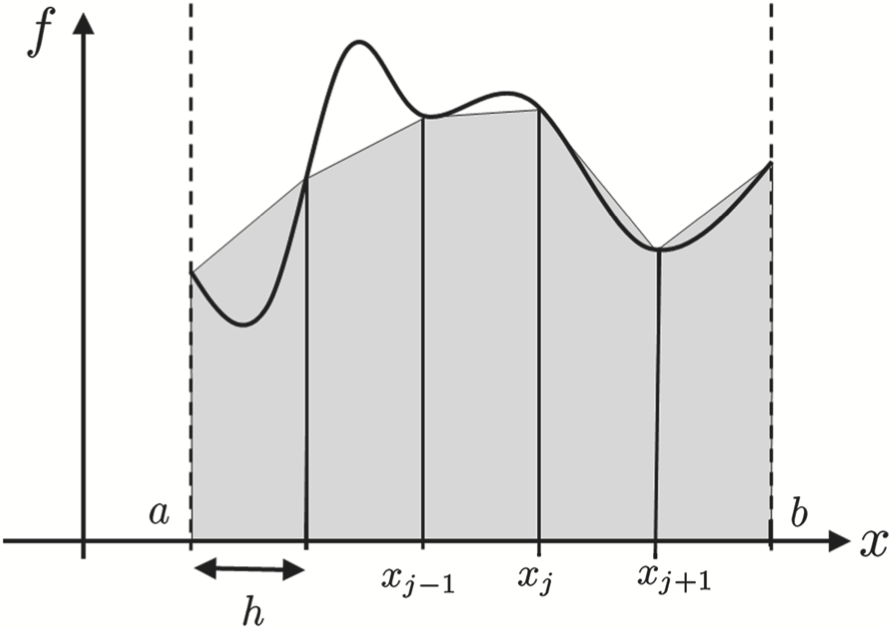 with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.***

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_riemannL = h * sum(f[:n-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

I_mid = h * sum(np.sin((x[:n-1] \
        + x[1:])/2))
err_mid = 2 - I_mid

print(I_riemannL)
print(err_riemannL)

print(I_riemannR)
print(err_riemannR)

print(I_mid)
print(err_mid)

1.9835235375094546
0.01647646249054535
1.9835235375094546
0.01647646249054535
2.0082484079079745
-0.008248407907974542


## **21.3 Trapezoid Rule**

The **Trapezoid Rule** fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral. This approximation for the integral to an arbitrary function is shown in the following figure. For each subinterval, the Trapezoid Rule computes the area of a trapezoid with corners at $(x_i, 0), (x_{i+1}, 0), (x_i, f(x_i))$ and $(x_{i+1}, f(x_{i+1}))$ which is $h\frac{f(x_i) + f(x_{i+1})}{2}$.

Since $\frac{h}2{(𝑓(𝑥_{𝑖+1})+𝑓(𝑥_𝑖))}$ is the Trapezoid Rule approximation for the integral over the subinterval, it is $𝑂(h^3)$ for a single subinterval and $𝑂(h^2)$ over the whole interval.

***Use the Trapezoid Rule to approximate $\int_0^𝜋sin(𝑥)𝑑𝑥$ with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.***

In [3]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(I_trap)
print(err_trap)

1.9835235375094546
0.01647646249054535


The trapezoidal rule often gives a more accurate approximation that the Riemann approximation because it takes into account the valye of the function at both endpoints, the left and the right endpoints of each interval. Due to this, they tend to closely follow the actual curve of the function. This method is a better approximation also because it uses fewer intervals.